In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Financials.csv')

In [3]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [4]:
df.shape

(700, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
Segment                  700 non-null object
Country                  700 non-null object
 Product                 700 non-null object
 Discount Band           700 non-null object
 Units Sold              700 non-null object
 Manufacturing Price     700 non-null object
 Sale Price              700 non-null object
 Gross Sales             700 non-null object
 Discounts               700 non-null object
  Sales                  700 non-null object
 COGS                    700 non-null object
 Profit                  700 non-null object
Date                     700 non-null object
Month Number             700 non-null int64
 Month Name              700 non-null object
Year                     700 non-null int64
dtypes: int64(2), object(14)
memory usage: 87.6+ KB


In [6]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

### There is no null value present in our dataset but we can see that  there is a error in columns names

In [7]:
# for making error free column we can use strip function to remove leading whitespaces
df.columns = df.columns.str.strip()

In [8]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

### Now we can see that there are no leading whitespaces

In [9]:
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

### Column like sold units has integer values as we can see but due to dollar sign it is considered as object data type so we have to remove dollar sign and convert into int data type

In [10]:
dollar = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for columns in dollar:
    df[columns] = df[columns].str.replace('$', '', regex=True)

In [11]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",-,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",-,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",-,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",-,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",-,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [12]:
df['Discounts'] = df['Discounts'].replace('-', '0', regex=True)

In [13]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",0,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",0,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",0,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",0,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",0,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [14]:
for columns in dollar:
    df[columns] = df[columns].replace(',', '', regex=True)

In [15]:
# for converting the object data type to float we can use astype function

df['Units Sold'] = df['Units Sold'].astype(float)
df['Manufacturing Price'] = df['Manufacturing Price'].astype(float)
df['Sale Price'] = df['Sale Price'].astype(float)
df['Gross Sales'] = df['Gross Sales'].astype(float)
df['Discounts'] = df['Discounts'].astype(float)
df['Sales'] = df['Sales'].astype(float)
df['COGS'] = df['COGS'].astype(float)

In [16]:
(df['Profit']==' -   ').sum()

5

In [17]:
df = df[df['Profit'] != ' -   ']

In [18]:
df['Profit'] = df['Profit'].str.strip()

In [19]:
df['Profit'] = df['Profit'].replace(r'[()]', '', regex=True)

In [20]:
df['Profit'] = df['Profit'].astype(float)

In [21]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

###  we can see that now all the columns which seems like integer now they are in float datatype

### But columns like Date and Year has not datatype as Date so we need to convert

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

### We don't need year, month number and month  name column because we can get these values from Date column so we can drop it

In [24]:
df = df.drop(['Month Number', 'Month Name', 'Year'], axis=1)

In [25]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06


### We done with all the cleaning methods and now data is cleaned in organised in proper format. Now we can go for the Data Analysis and Visualization

## Country Wise Analysis

In [26]:
group = df.groupby('Country').agg({'Sales':'sum', 'Profit':'sum', 'Units Sold':'sum', 'COGS':'sum'}).reset_index()

In [27]:
group

,Country,Sales,Profit,Units Sold,COGS
0,Canada,24887654.89,3858206.39,247428.5,21358426.0
1,France,23995612.29,4032488.29,237943.0,20214591.5
2,Germany,23409940.82,3961381.32,200699.0,19729552.0
3,Mexico,20547352.11,3198923.11,199975.0,17639829.0
4,United States of America,25029830.18,3397345.68,232627.5,22034289.5


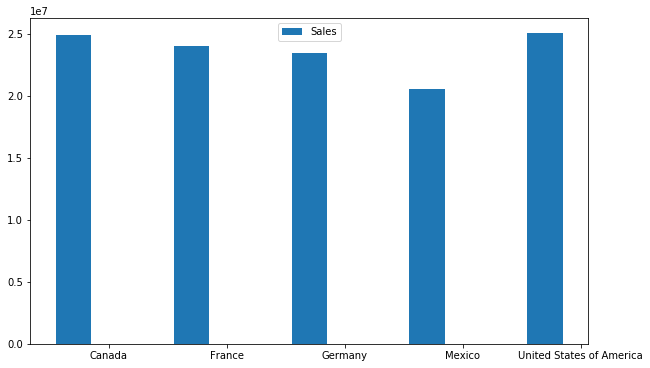

In [28]:
bar_width = 0.3
plt.figure(figsize=(10,6))

# calculate x positions for the bars
x = np.arange(len(group['Country']))
plt.bar(x-bar_width, group['Sales'], bar_width, label='Sales')

plt.xticks(x, group['Country'])
plt.legend()
plt.show()

### We can see that highest sale is noticed in USA and in Canada and lowest sale is recorded in Mexico

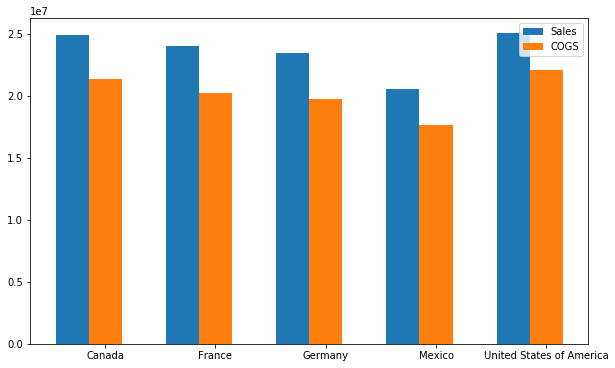

In [29]:
plt.figure(figsize=(10,6))
x=np.arange(len(group['Country']))

plt.bar(x-bar_width, group['Sales'], bar_width, label='Sales')
plt.bar(x, group['COGS'], bar_width, label='COGS')

plt.xticks(x, group['Country'])
plt.legend()
plt.show()

### We can see that sales is more than COGS(Cost of Gross Sale) it means company is in profit

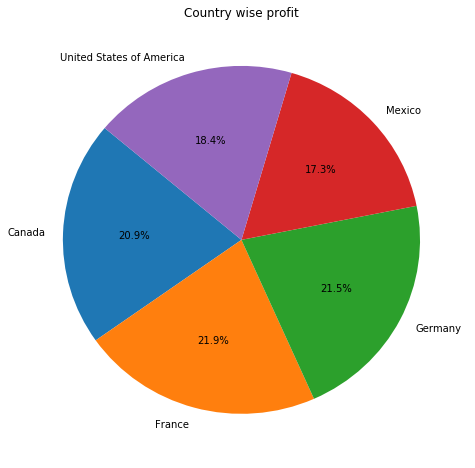

In [30]:
plt.figure(figsize=(8,8))

plt.pie(group['Profit'], labels=group['Country'], autopct='%1.1F%%', startangle=140)
plt.title('Country wise profit')
plt.show()

## Product wise analysis

In [31]:
group_product = df.groupby('Product').agg({'Units Sold':'sum', 'Manufacturing Price':'mean', 'Sale Price':'mean', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

In [32]:
# we can create one more column which contain margin that is selling price minus manufacturing price
group_product['Gross Margin'] = group_product['Sale Price'] - group_product['Manufacturing Price']

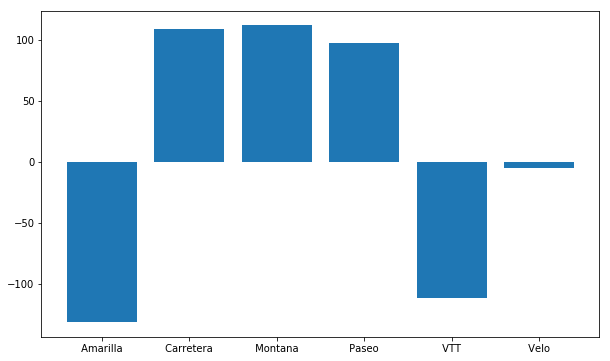

In [33]:
plt.figure(figsize=(10,6))

categories = group_product['Product']
margin_values = group_product['Gross Margin']
 
# create a bar chart
plt.bar(categories, margin_values, label='Gross Margin')
plt.xticks(group_product['Product'])

plt.show()

### From above figure we can see that product 'Amrilla' and product 'VTT' has negative gross margin and product 'Velo' has very low margin

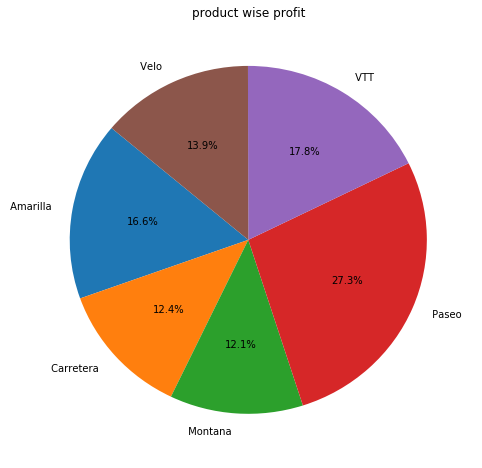

In [34]:
plt.figure(figsize=(8,8))

plt.pie(group_product['Profit'], labels=group_product['Product'], autopct='%1.1f%%', startangle=140)
plt.title('product wise profit')

plt.show()

### From here we can see that Paseo has highest profit and Montana have low profit

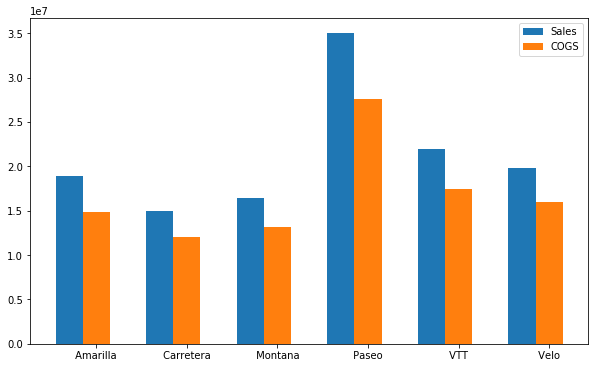

In [35]:
plt.figure(figsize=(10,6))

x=np.arange(len(group_product['Product']))
plt.bar(x-bar_width, group_product['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_product['COGS'], bar_width, label='COGS')

plt.xticks(x, group_product['Product'])
plt.legend()
plt.show()

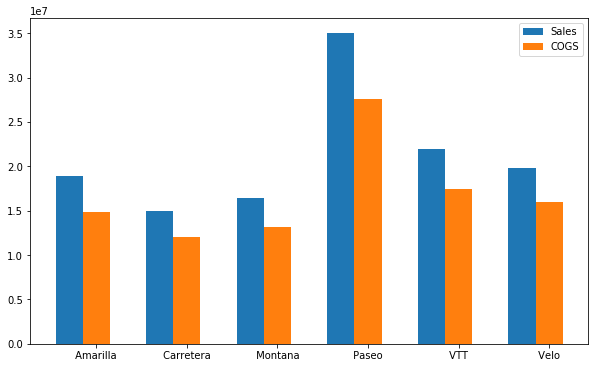

In [36]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width, group_product['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_product['COGS'], bar_width, label='COGS')
# plt.bar(x+bar_width, group['Units Sold'], bar_width, label='Units Sold')

# plt.xlabel('Country')
# plt.ylabel('Values')
plt.xticks(x, group_product['Product'])
plt.legend()
plt.show()


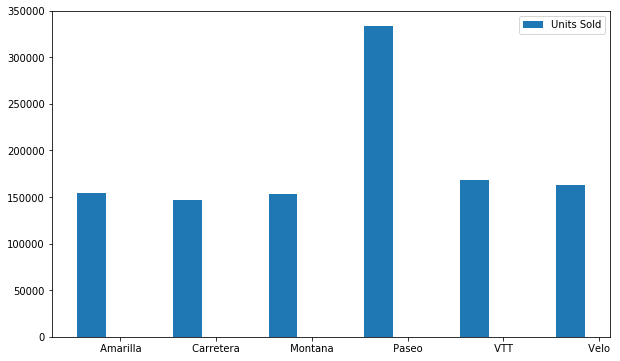

In [37]:
bar_width = 0.3
plt.figure(figsize=(10,6))

# calculate the x positions for the bars
x=np.arange(len(group_product['Product']))
plt.bar(x-bar_width, group_product['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x, group_product['Product'])
plt.legend()
plt.show()

### From here we can clearly see that Paseo is the product which sells maximum

## Sector wise analysis

In [38]:
group_segment = df.groupby('Segment').agg({'Units Sold':'sum', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

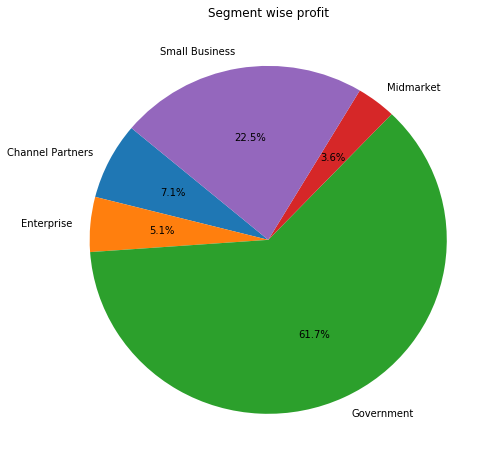

In [39]:
plt.figure(figsize=(8,8))

plt.pie(group_segment['Profit'], labels=group_segment['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Segment wise profit')
plt.show()

### Government segment gives most profit and Midmarket gives least profit

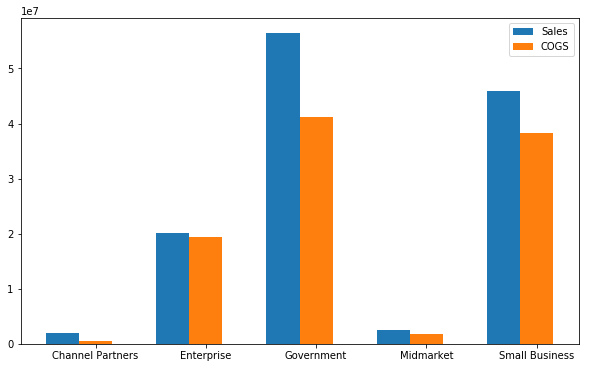

In [40]:
plt.figure(figsize=(10,6))

x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_segment['COGS'], bar_width, label='COGS')

plt.xticks(x, group_segment['Segment'])
plt.legend()
plt.show()

###  In the Enterprise sector cost of sales and sales is almost same so we can say that margin in that sector could be low and in government sector difference between Sales  and COGS is more means this sector has more margin

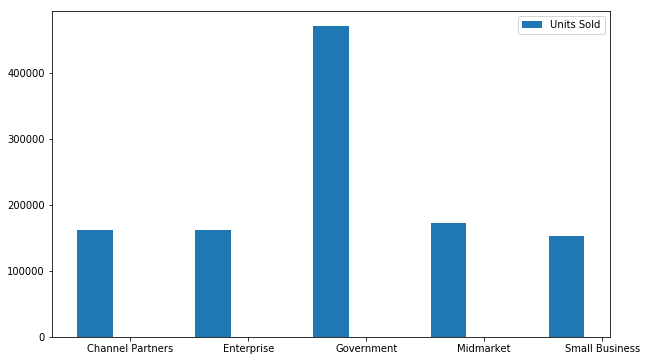

In [41]:
bar_width = 0.3
plt.figure(figsize=(10,6))

x=np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x, group_segment['Segment'])
plt.legend()
plt.show()

### more units are sold in government sector then mid market and least units are sold in small business